In [ ]:
# 1. Вам дан список. Поменяйте порядок следования элементов, начиная с середины до конца списка.
import random
lst = [random.randint(15, 25) for i in range(7)]
print(lst)
lst[(len(lst) // 2) : ] = lst[-1:(len(lst) // 2) - 1:-1]
print(lst)

[25, 20, 15, 16, 17, 22, 25]
[25, 20, 15, 25, 22, 17, 16]


In [ ]:
# 2. Вам дан список. Поменяйте в нём местами блоки элементов: каждый чётный со второго по пятый с каждым нечётым со второго по пятый с конца.
lst = [i for i in range(1, 11)]
print(lst)
block1 = lst[1:5:2]
block2 = lst[-5:-1:2]
lst[1:5:2] = block2
lst[-5:-1:2] = block1
print(lst)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 6, 3, 8, 5, 2, 7, 4, 9, 10]


In [ ]:
# 3. Вам дан список. Создайте новый список, который возведёт в квадрат элементы исходного списка.
lst = [1, 2, 3, 4, 5]
new_lst = [i**2 for i in lst]
print(new_lst)

[1, 4, 9, 16, 25]


In [ ]:
# 4. Вам дан список. Создайте новый список, который вычитает из каждого элемента списка пять.
lst = list(range(10, 20, 2))
print(lst)
new_lst = [i-5 for i in lst]
print(new_lst)

[10, 12, 14, 16, 18]
[5, 7, 9, 11, 13]


In [ ]:
# 5. Вам дана строка. Выведите разницу между наибольшим и наименьшим ascii-кодом символа в строке.
def difference_ascii(s):
  max = 0
  min = 0
  for index, chr in enumerate(s):
    ascii = ord(chr)
    if index == 0:
      min = ascii
      max = ascii

    if ascii < min:
      min = ascii
    elif ascii > max:
      max = ascii

  return (max - min)

example = 'sightseeing'
print(difference_ascii(example))

15


In [ ]:
# 6. Вам дана строка. Выведите отсортированную строку, приведённую к верхнему регистру.
s = 'geekforgeeks'
s = ''.join(sorted(s))
s = s.upper()
print(s)

EEEEFGGKKORS


In [ ]:
# 7. Вам дан одномерный массив. На основе этого массива сгенерируйте двумерный массив, который группирует по 4 элемента в строку из исходного.
import numpy as np

narr = np.arange(16)
narr = narr.reshape(-1, 4)
print(narr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [ ]:
# 8. Дан одномерный массив чисел. Создайте двумерный массив, где строка - это бинарное представление числа из исходного.
import numpy as np

narr = np.arange(5)
print(narr)
new_narr = np.array([[bin(i).replace("0b", "0"*(10 - len(bin(i))))] for i in range(narr.shape[0])])
print(new_narr)

[0 1 2 3 4]
[['00000000']
 ['00000001']
 ['00000010']
 ['00000011']
 ['00000100']]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving laptop_price.csv to laptop_price.csv
User uploaded file "laptop_price.csv" with length 198100 bytes


[dtype('int64') dtype('O') dtype('float64')]


<Figure size 1000x600 with 0 Axes>

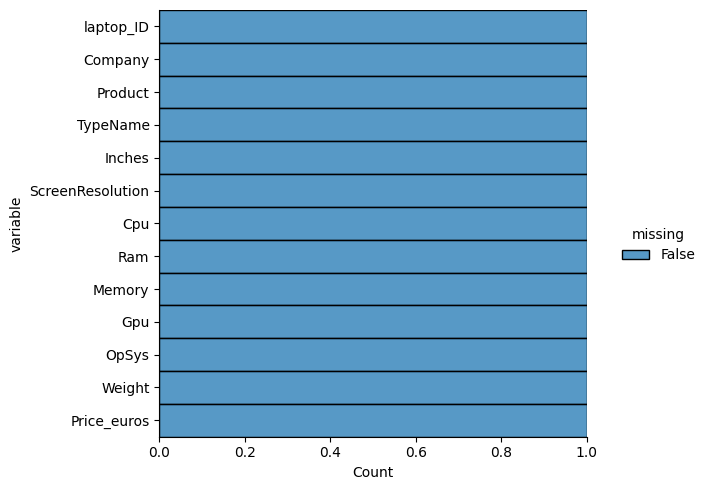

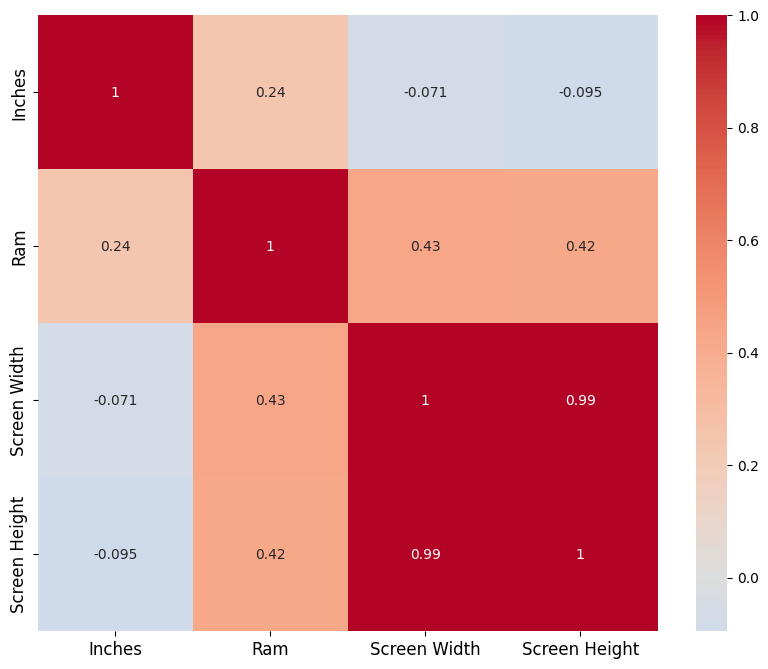

In [ ]:
df = pd.read_csv("laptop_price.csv", encoding='latin-1')

# 1. Какие типы данных присутствуют в датасете?
print((df.dtypes).unique())

# 2. Есть ли в датасете пропущенные значения? Если да, то сколько и где?
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

# 3. Очистите переменные: например Ram от Gb (сделав ее числовой), ScreenResolution создайте две колонки, например, ширина отдельно и длинна отдельно (тем самым сделав ее числовой), разделите колонку Cpu отдельно на тип процессора и отдельно на часототу, и так далее.
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(int)
df['ScreenResolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df[['Screen Width', 'Screen Height']] = df['ScreenResolution'].str.split('x', expand=True)
df = df.drop(columns = ['ScreenResolution'])

# 4. Постройте heatmap для матрицы корреляции числовых переменных в датасете.
corr_df = df[['Inches', 'Ram', 'Screen Width', 'Screen Height']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df, xticklabels=corr_df.columns, yticklabels=corr_df.columns, cmap='coolwarm', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<Figure size 1000x800 with 0 Axes>

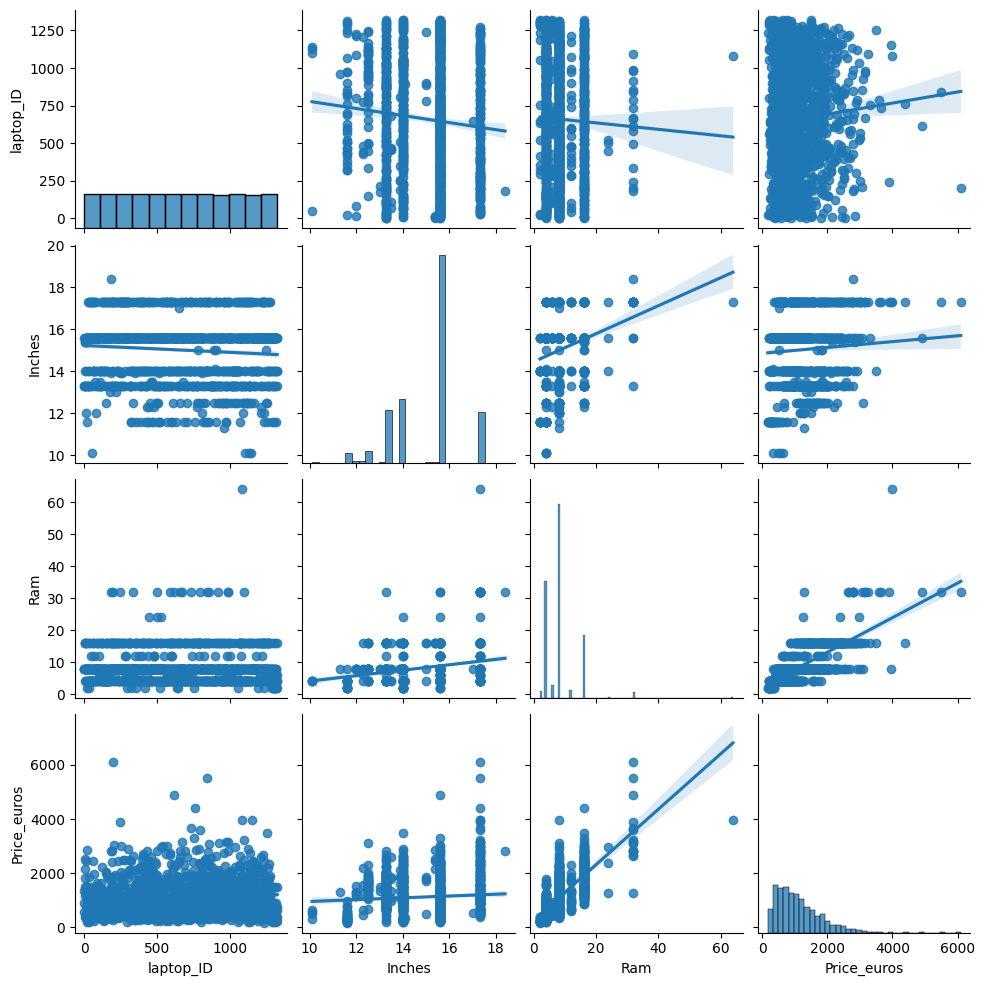

In [ ]:
# 5. Постройте pairplot для всех переменных.
plt.figure(figsize=(10,8))
sns.pairplot(df, kind="reg")
plt.show()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height
20,21,Asus,Vivobook E200HA,Netbook,11.6,Intel Atom x5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,0.98kg,191.90,1366,768
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.00,1920,1200
177,181,MSI,GT80S 6QF-074US,Gaming,18.4,Intel Core i7 6920HQ 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,2799.00,1920,1080
314,319,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.1kg,275.00,1366,768
319,324,Acer,TravelMate B,Notebook,11.6,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.4kg,485.00,1366,768
348,354,Asus,VivoBook Flip,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,375.00,1366,768
376,382,Lenovo,Yoga 11e,Netbook,11.6,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59kg,553.00,1366,768
409,416,Lenovo,Lenovo IdeaPad,Notebook,11.6,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15kg,304.45,1366,768
429,436,Mediacom,FlexBook Edge,2 in 1 Convertible,11.6,Intel Celeron Dual Core N3350 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.16kg,299.00,1920,1080
430,437,Samsung,Chromebook 3,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15kg,269.00,1366,768


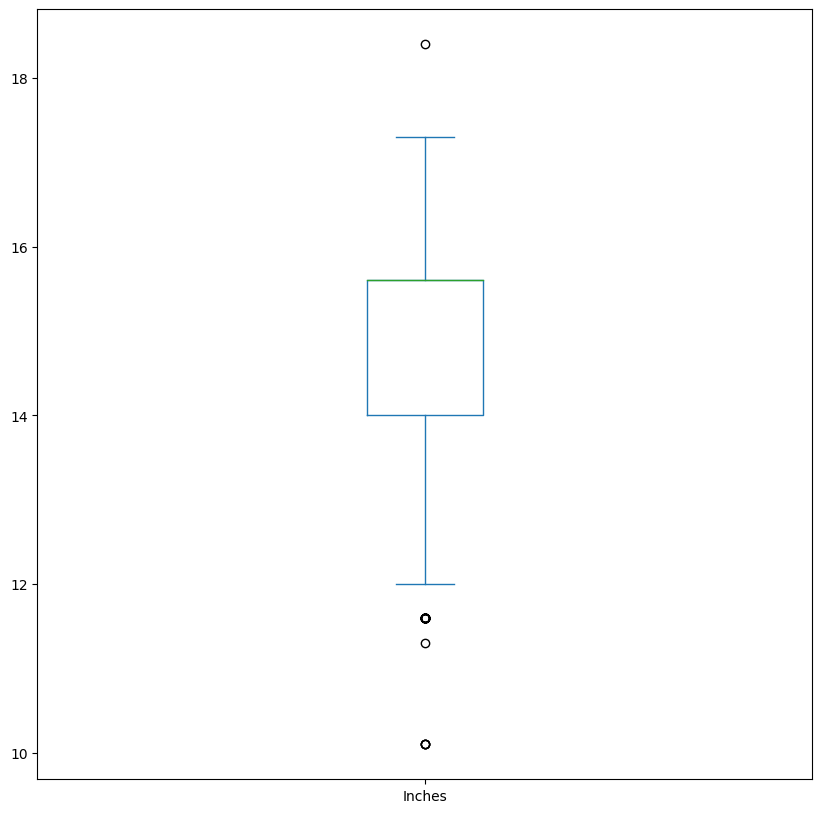

In [ ]:
# 6. Постройте boxplot для всех переменных и выведете объекты которые являются выбросами (строки из датафрейма).
plt.figure(figsize=(10,10))

df['Inches'].plot(kind='box')

Q1 =  df['Inches'].quantile(0.25)
Q3 = df['Inches'].quantile(0.75)
IQR = Q3 - Q1
df[(df['Inches'] < Q1-1.5*IQR ) | (df['Inches']> Q3+1.5*IQR)]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen Width,Screen Height
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
6,7,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2880,1800
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,1920,1080
12,13,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,2439.97,2880,1800
17,18,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2858.00,2880,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,1265,Asus,Rog GL502VS,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34kg,2325.00,1920,1080
1256,1274,Asus,Rog G752VT-GC073T,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.0kg,1900.00,1920,1080
1271,1289,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800
1285,1303,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800


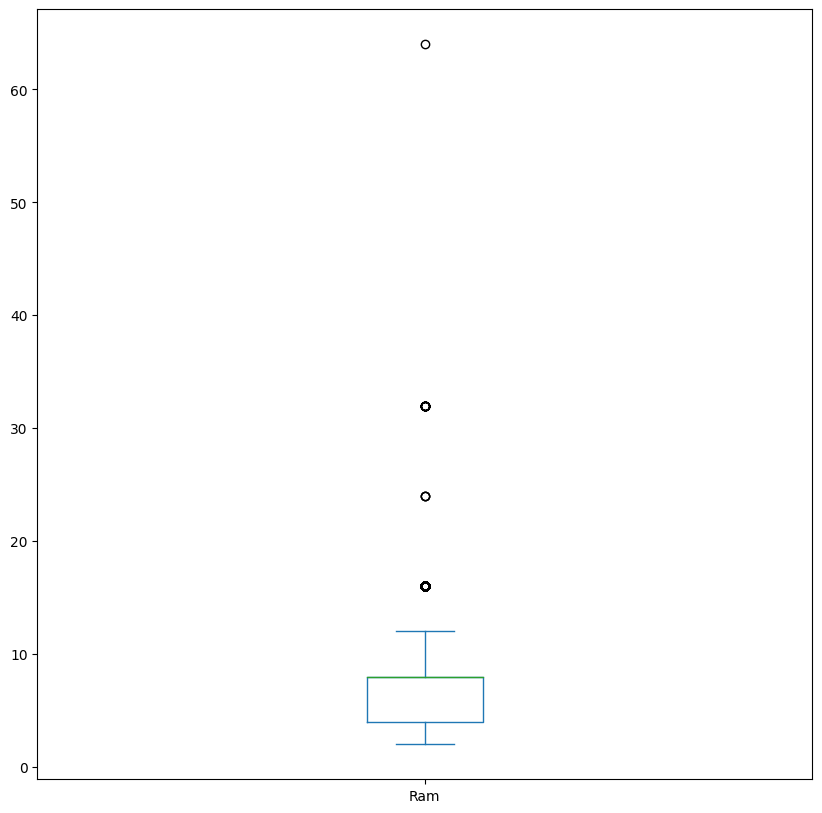

In [ ]:
plt.figure(figsize=(10,10))

df['Ram'].plot(kind='box')

Q1 =  df['Ram'].quantile(0.25)
Q3 = df['Ram'].quantile(0.75)
IQR = Q3 - Q1
df[(df['Ram'] < Q1-1.5*IQR ) | (df['Ram']> Q3+1.5*IQR)]

<Figure size 1500x2500 with 0 Axes>

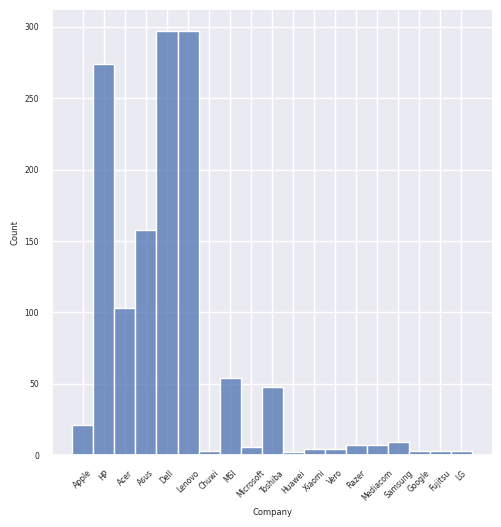

In [ ]:
# 7. Постройте гистограмму переменной Company
plt.figure(figsize=(15,25))
sns.set(font_scale = 0.5)
f = sns.displot(data=df, x='Company')
f.set_xticklabels(rotation=45)
plt.show()